In [33]:
'''Train a simple deep CNN on myl images dataset.

GPU run command:
    THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python cifar10_cnn.py ???
'''

from __future__ import print_function


from img_loader_test import test
from img_loader_train import train
#import img_loader_test
#import img_loader_train

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils

resize=32 
batch_size = 18
train_output=train(resize)
nb_classes = train_output[2]
test_output=test(resize)
nb_epoch = 100
data_augmentation = True

# input image dimensions
#rs=train_output[3]
rs=resize
img_rows=rs #must be the same as the rs in the img_loader_* files
img_cols = rs
# the JPEG images are RGB
img_channels = 3

# the data, shuffled and split between train and test sets
X_train =train_output[0]
y_train=train_output[1]
X_test=test_output[0]
y_test=test_output[1]
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(16, 7, 7, border_mode='same',
                        input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
#model.add(Convolution2D(32, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Convolution2D(64, 3, 3, border_mode='same'))
#model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(20))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# let's train the model using SGD + momentum (how original).
sgd = SGD(lr=0.05, decay=1e-5, momentum=0.1, nesterov=False)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')

    # this will do preprocessing and realtime data augmentation
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(X_train)

    # fit the model on the batches generated by datagen.flow()
    model.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch,
                        validation_data=(X_test, Y_test))


X_train shape: (18, 3, 32, 32)
18 train samples
13 test samples
Using real-time data augmentation.
Epoch 1/100
18/18 [==============================] - 0s - loss: 1.1173 - acc: 0.3333 - val_loss: 0.6286 - val_acc: 0.6154
Epoch 2/100
18/18 [==============================] - 0s - loss: 1.7117 - acc: 0.5000 - val_loss: 2.2508 - val_acc: 0.4615
Epoch 3/100
18/18 [==============================] - 0s - loss: 2.1092 - acc: 0.3889 - val_loss: 1.6351 - val_acc: 0.0000e+00
Epoch 4/100
18/18 [==============================] - 0s - loss: 1.5981 - acc: 0.1667 - val_loss: 1.0925 - val_acc: 0.3077
Epoch 5/100
18/18 [==============================] - 0s - loss: 1.0824 - acc: 0.2778 - val_loss: 1.0777 - val_acc: 0.3846
Epoch 6/100
18/18 [==============================] - 0s - loss: 1.0632 - acc: 0.4444 - val_loss: 1.0700 - val_acc: 0.3846
Epoch 7/100
18/18 [==============================] - 0s - loss: 1.0482 - acc: 0.5000 - val_loss: 1.0552 - val_acc: 0.4615
Epoch 8/100
18/18 [========================

array([[ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

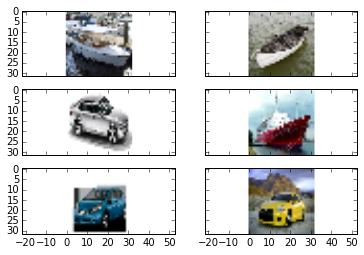

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
X_plot=np.ndarray.transpose(X_test,(0,3,2,1))
sx,sy=(3,2)
f,con=plt.subplots(sx,sy,sharex='col',sharey='row')
for xx in range(sx):
    for yy in range(sy):
        con[xx,yy].imshow(X_plot[xx*2+yy,:,:,:])

Y_test


In [19]:
x[0].shape

NameError: name 'x' is not defined